In [1]:
# Plotting
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np

# Dataframes
import pandas as pd

# Matplotlib magic command
%matplotlib inline


### Matplotlib.pyplot

From pyplot documentation - matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

Note - the pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as methods from an Axes object. We recommend browsing the tutorials and examples to see how this works.


Chapter 4 of Data Science Handbook by Vanderplas is about matplotlib

One of Matplotlib’s most important features is its ability to play well with many operating
systems and graphics backends. Matplotlib supports dozens of backends and
output types, which means you can count on it to work regardless of which operating
system you are using or which output format you wish. This cross-platform,
everything-to-everyone approach has been one of the great strengths of Matplotlib. (p. 217)

the IPython notebook,
you also have the option of embedding graphics directly in the notebook, with two
possible options:
• %matplotlib notebook will lead to interactive plots embedded within the
notebook
• %matplotlib inline will lead to static images of your plot embedded in the
Notebook (p. 220)

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient
MATLAB-style state-based interface, and a more powerful object-oriented interface. (p. 222)
stateful: it keeps track of the “current” figure and axes, which are where all plt commands are applied (p. 222). While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. (p. 223)
The object-oriented interface is available for these more complicated situations, and
for when you want more control over your figure. Rather than depending on some
notion of an “active” figure or axes, in the object-oriented interface the plotting functions
are methods of explicit Figure and Axes objects. (p. 223)
See also - https://stackoverflow.com/questions/24764918/what-does-it-mean-when-they-say-stateful
https://medium.com/@The_Gambitier/matplotlib-essentials-e376ed954201

Throughout this chapter, we will switch between the MATLAB-style
and object-oriented interfaces, depending on what is most convenient. In most cases,
the difference is as small as switching plt.plot() to ax.plot(), but there are a few
gotchas that we will highlight as they come up in the following sections. (p. 223)

------
"Matplotlib's documentation and examples use both the OO and the pyplot approaches (which are equally powerful), and you should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project)." - https://matplotlib.org/stable/tutorials/introductory/usage.html

https://nbviewer.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb


Probably need to briefly explain MATLAB to explain matplotlib/the name

From Matplotlib official Documentation

The following introductory text was written in 2008 by John D. Hunter (1968-2012), the original author of Matplotlib. - Matplotlib is a library for making 2D plots of arrays in Python. Although it has its origins in emulating the MATLAB graphics commands, it is independent of MATLAB, and can be used in a Pythonic, object oriented way. Although Matplotlib is written primarily in pure Python, it makes heavy use of NumPy and other extension code to provide good performance even for large arrays.

The Matplotlib code is conceptually divided into three parts: 
the pylab interface is the set of functions provided by pylab which allow the user to create plots with code quite similar to MATLAB figure generating code (Pyplot tutorial). 
The Matplotlib frontend or Matplotlib API is the set of classes that do the heavy lifting, creating and managing figures, text, lines, plots and so on (Artist tutorial). This is an abstract interface that knows nothing about output. 
The backends are device-dependent drawing devices, aka renderers, that transform the frontend representation to hardcopy or a display device


From elsewhere in official documentation
The pyplot API
matplotlib.pyplot is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.


-----------
RealPython

Pylab within matploblib is a holdover to make it more similar to MATLABs functionality where importing is not as heavily used as in python and makes most of the functions immediately available to the user, but using it in python is considered bad practice as it may cause bugs and conflicts with python built-ins. As such, it’s convention and recommended to import pylot instead.

-------

Various tutorials suggest adding the following after importing matplotlib:
%matplotlib inline
As it helps plots to show more consistently in jupyter

To make multiple plots sidebyside - plt.subplot()


In [2]:
# Real life data to be used in sample plots
# Data was manually cleaned at parts so the sport names would be more consistant
# The sport for F1 drivers was inconsistantly named - manually changed all to "F1 Racing"
# In original file, changed between "Auto Racing", "F1 Motorsports", and "F1 Racing"
# Nascar inconsistantly named - manually changed all to Nascar
# In original file, changed between "Auto Racing", "Auto Racing (Nascar)", and "Nascar"
# Changed three instances of "NFL" to the more commonly entered "American Football"
# Changed one instance of "NBA" to the more commonly entered "Basketball"
# Changed one instance of "Hockey" to the more commonly entered "Ice Hockey"
df = pd.read_csv('forbes.csv', header=[0])


### Scatterplot

In [3]:
a = [1, 2, 3, 4, 5]
b = [1, 5, 7, 15, 22]

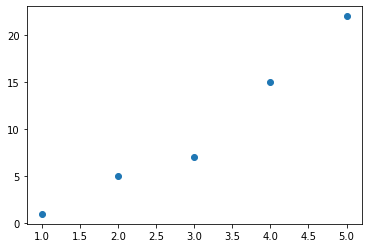

In [4]:
# A simple scatterplot using plt.plot
# By default, plt.plot returns a line plot, 
# but adding 'o' changes the marker type, transforming the plot to a scatterplot
plt.plot(a, b, 'o')

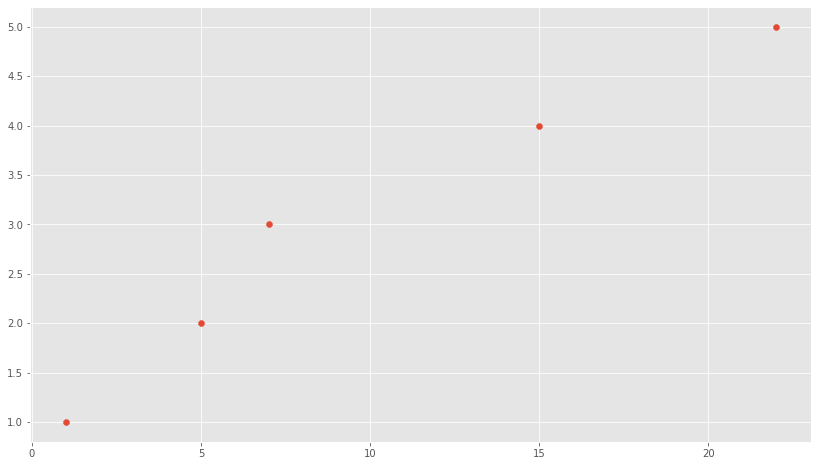

In [38]:
# We can also change the plot style
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

# Change the style of plots.
plt.style.use('ggplot')

# Change the default size of plots
plt.rcParams["figure.figsize"] = (14, 8)

# The same simple scatterplot using plt.scatter, with axes swapped
plt.scatter(b, a)

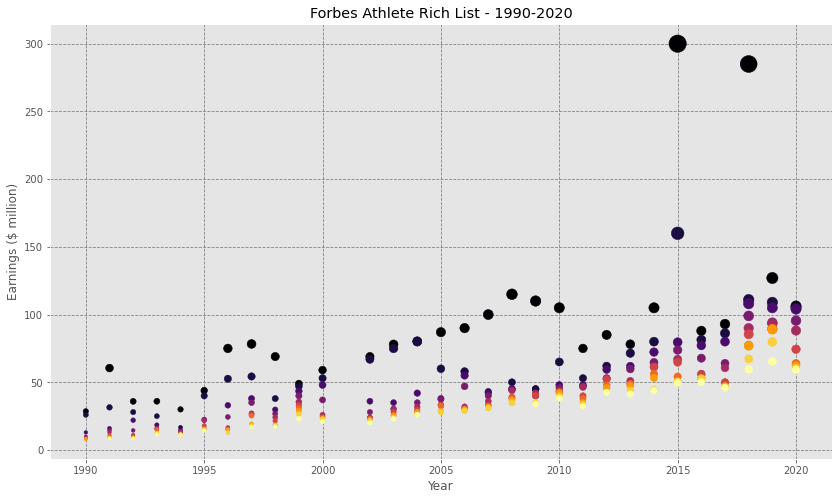

In [90]:
# A plot using Forbes dataframe
# Using "s=df["earnings ($ million)"]" changes the size of the points based on that variables' value
# Using "c=df["Current Rank"]" changes that colour of the plot point, in this instance based on ranking
plt.scatter(x=df["Year"], y=df["earnings ($ million)"], 
            s=df["earnings ($ million)"],c=df["Current Rank"], marker='o', 
           cmap = 'inferno')

# Adding titles and labels to plot
plt.title("Forbes Athlete Rich List - 1990-2020")
plt.xlabel("Year")
plt.ylabel("Earnings ($ million)")
plt.grid(True, color='gray', linestyle = "--")

# Save the output plot
plt.savefig('ForbesRichScatter.png')

In [7]:
# We can see on the plot that there are only two entries above $200m
# We can look and see that Floyd Mayweather is an outlier, twice earning
# almost double the athlete in 2nd place
df[df['earnings ($ million)'] >= 250]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0


### Histogram

In [8]:
# Importing the numpy random number generator as per numpy documentation recommendation
from numpy.random import default_rng
rng = default_rng()

In [9]:
# Defining the mean and standard deviation that will be used by the rng
mu, sigma = 20000, 100

# Using numpy random to generate 1000 instances of normally distributed data
random = np.random.default_rng().normal(mu, sigma, 1000)

Text(20200, 225, '$\\mu=20000,\\ \\sigma=100$')

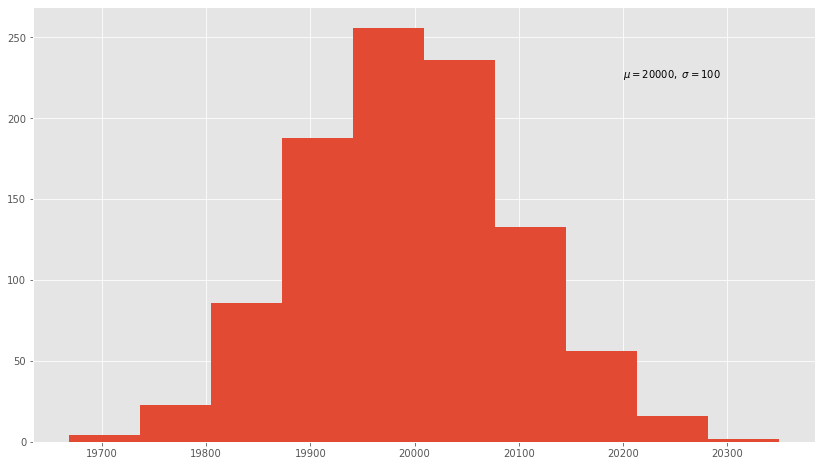

In [89]:
# Plotting the randomly generated data to view the distribution
plt.hist(random)

# Add text to plot showing mu and sigma
plt.text(20200, 225, r'$\mu=20000,\ \sigma=100$')

([<matplotlib.axis.XTick at 0x18e82e07cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

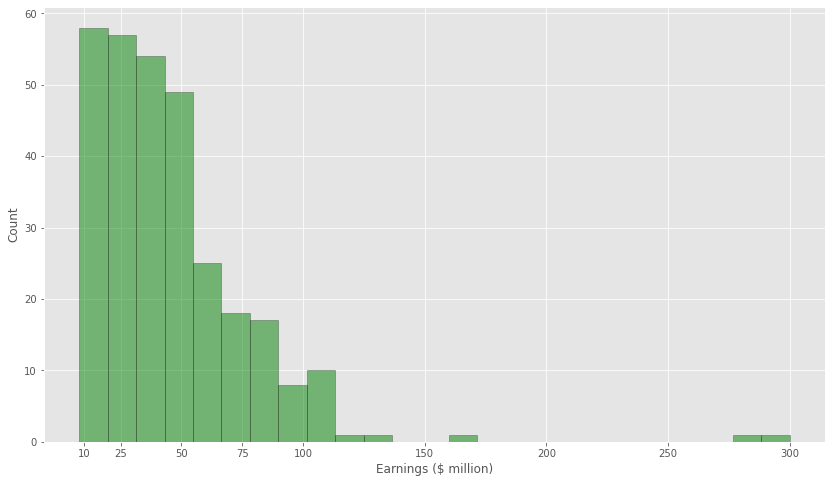

In [102]:
# Distribution of the earnings in the Forbes dataframe
# Set alpha to make plot transparant to more easily see grid
plt.hist(df["earnings ($ million)"], bins = 25, color='g', 
         alpha=0.5, edgecolor='black')
plt.xlabel("Earnings ($ million)")
plt.ylabel("Count")

# Giving the plot unique ticks on the x-axis so there are more markers where the plot has more datapoints
x_ticks = [10, 25, 50, 75, 100, 150, 200, 250, 300]

#add x-axis values to plot
plt.xticks(ticks=x_ticks)


In [82]:
# Notable drops in the amount of people in each Earnings bin ~$50m+ and again at  >~$100m

### Bar Chart

In [51]:
# Example Data
amount = [9, 4, 8, 3, 7]
fruit = ["apple", "pear", "orange", "avocado", "banana"]

<BarContainer object of 5 artists>

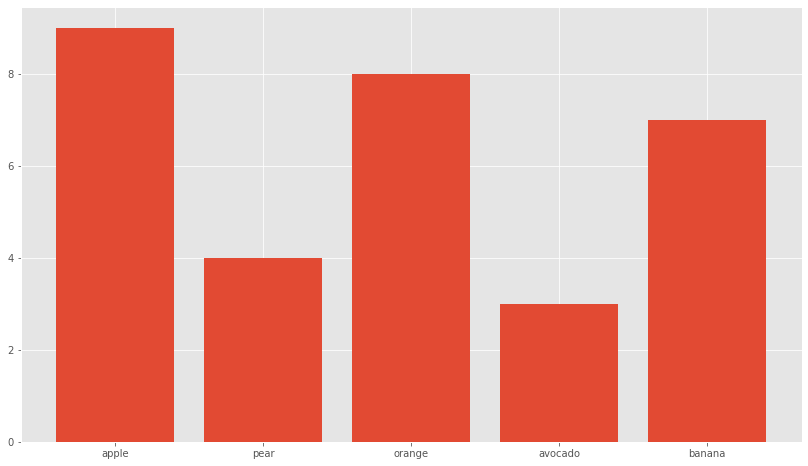

In [52]:
# Plotting the example data in a bar chart
plt.bar(fruit, amount)

([<matplotlib.axis.YTick at 0x18efccc4eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

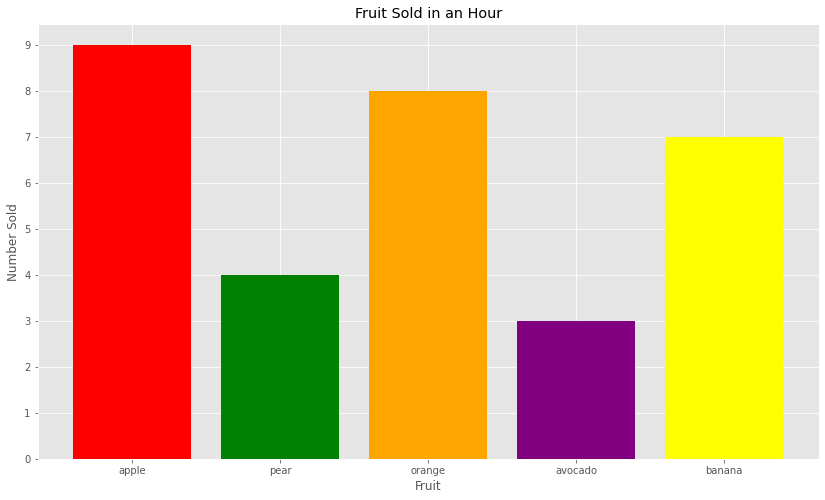

In [53]:
# Change the bar colours and add axis labels
plt.bar(fruit, amount, 
       color=['red', 'green', 'orange', 'purple', 'yellow'])
plt.title("Fruit Sold in an Hour")
plt.xlabel("Fruit")
plt.ylabel("Number Sold")

# Set y-axis ticks to increase by 1 rather than 2
plt.yticks(ticks=np.arange(10))

In [29]:
# The data in the sports colums was entered in both title case and lower case
# Changed all to title to make the count easier
df.Sport = df.Sport.str.title()
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,F1 Racing,1990,10.0
4,5,Alain Prost,France,5,NaN,F1 Racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [71]:
# Create a new df that groups sport by apperances in list and total sport earnings
df_sport = df.groupby('Sport').count()[['Year']]
df_sport['Total Earnings ($ million)'] = df.groupby('Sport').sum()['earnings ($ million)']
df_sport = df_sport.rename(columns={'Year':'Count'})
df_sport.reset_index(level=0, inplace=True)
df_sport

,Sport,Count,Total Earnings ($ million)
0,American Football,20,938.7
1,American Football / Baseball,1,22.5
2,Baseball,6,146.1
3,Basketball,82,3433.3
4,Boxing,46,2298.8
5,Cycling,1,28.0
6,F1 Racing,30,1004.8
7,Golf,44,2136.5
8,Ice Hockey,4,75.7
9,Mma,1,99.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

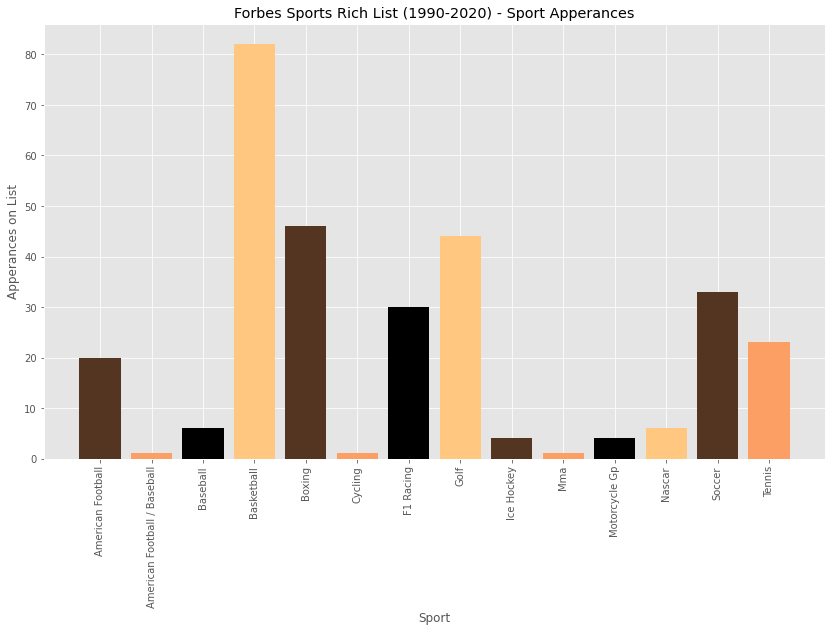

In [76]:
# Convert cmap to colors for barchart
# https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/
data_color = [200.,600.,0.,750.]
data_color_normalized = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('copper')
colors = my_cmap(data_color_normalized)

# Plot Forbes Rich List by sport count
plt.bar(df_sport['Sport'], df_sport['Count'], color=colors)

# Add labels
plt.title("Forbes Sports Rich List (1990-2020) - Sport Apperances")
plt.xlabel("Sport")
plt.ylabel("Apperances on List")

# rotate axis labels as they were illegible and on top of each other by default
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

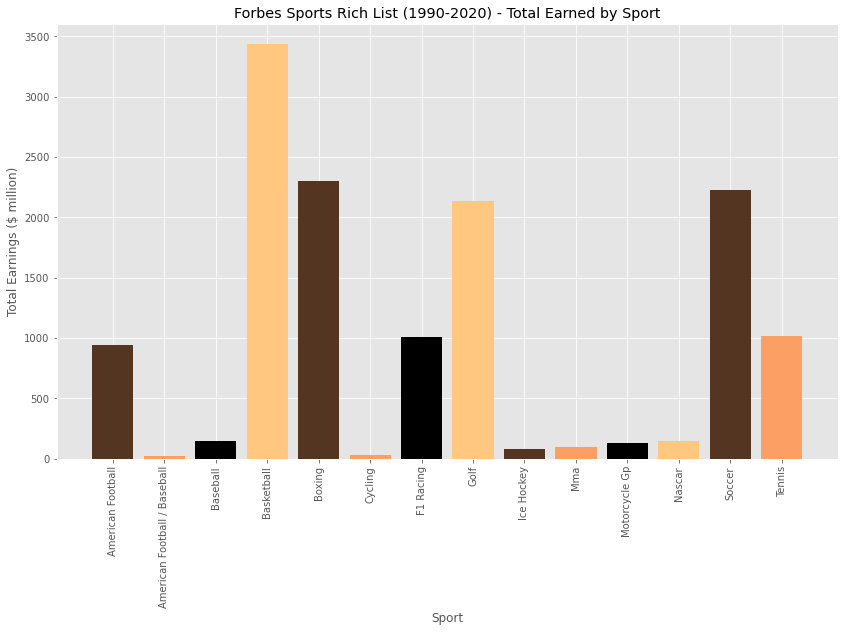

In [77]:
# Plot Forbes Rich List by Total Earnings
plt.bar(df_sport['Sport'], df_sport['Total Earnings ($ million)'], color=colors)

# Add labels
plt.title("Forbes Sports Rich List (1990-2020) - Total Earned by Sport")
plt.xlabel("Sport")
plt.ylabel("Total Earnings ($ million)")

# Rotate axis labels as they were illegible and on top of each other by default
plt.xticks(rotation=90)

### References